# Convolutional Neural Networks Project


---

# **Working with CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

### Step 1:

Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

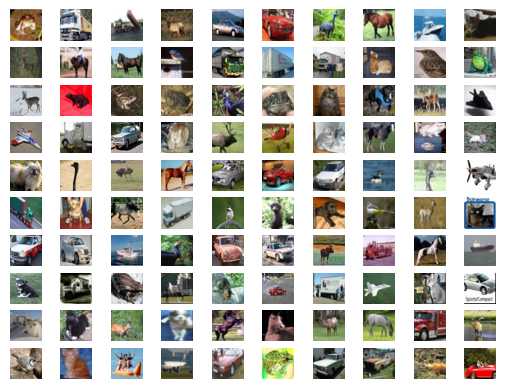

In [2]:
# Create a 10 x 10 plot showing 10 random samples from each class.
import matplotlib.pyplot as plt

for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, i*10+j+1)
        plt.imshow(x_train[i*10+j])
        plt.axis('off')
plt.show()

### Step 2:

Convert the labels to one-hot encoding.

In [3]:
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

print(x_test.shape)

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


### Step 3:

Normalize the images

In [4]:
# Normalize the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Defining the model

Here we wil start wit the basic model and we´ll start adding diferent layers, hyperparameters etc to see what works best

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer= 'sgd', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1646 - loss: 2.2607 - val_accuracy: 0.2460 - val_loss: 2.1288
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2600 - loss: 2.0920 - val_accuracy: 0.2797 - val_loss: 2.0095
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2996 - loss: 1.9955 - val_accuracy: 0.3140 - val_loss: 1.9526
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3186 - loss: 1.9415 - val_accuracy: 0.3209 - val_loss: 1.9258
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3351 - loss: 1.9053 - val_accuracy: 0.3488 - val_loss: 1.8737
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3506 - loss: 1.8742 - val_accuracy: 0.3581 - val_loss: 1.8433
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3612 - loss: 1.8387 - val_accuracy: 0.3685 - val_loss: 1.8190
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3727 - loss: 1.8142 - val_accuracy: 0.3600 - v

*   Plot the cross entropy loss curve and the accuracy curve

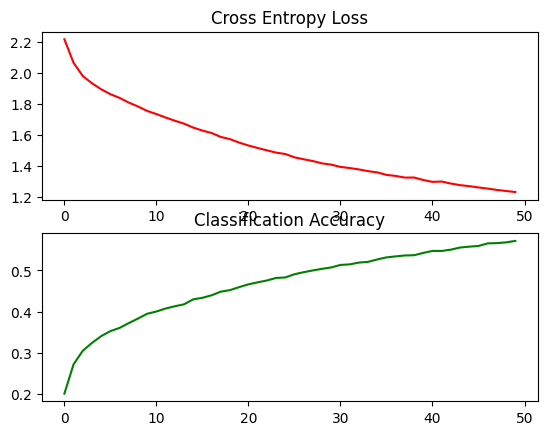

In [8]:
# Plot Cross Entropy Loss curve
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='red', label='train')


# Plot accuracy curve
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()


In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5534 - loss: 1.2591
Test accuracy: 0.55


In [ ]:
# Predict the output for the test split
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_class)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()